In [2]:
# library(minfi)
library(dplyr)
library(RColorBrewer)
library(ggplot2)
library(viridis)
library(reshape2)
library(data.table)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
library(doParallel)

registerDoParallel(cores=24)

Loading required package: foreach



Loading required package: iterators

Loading required package: parallel



In [52]:
beta <- read.table('/disk0/sm/methyl/TEST/0908/data/headmap_beta_100.txt', sep="\t", fill = TRUE, header=TRUE, row.names=1)
# beta_50 <- beta[1:50, ]
dim(beta)

[1] 100 734

In [1]:
# ## sample sheet에서 그룹 가져오는법
# sample <- read.table('/disk0/sm/methyl/TEST/0908/sample_sheet.csv', sep=",", fill = TRUE, col.names=c('Sample_Name', 'Sample_Well', 'Sample_Plate', 'Sample_Group', 'Pool_ID', 'Sentrix_ID', 'Sentrix_Position', 'Group', 'Gender', 'Horvath', 'age'))[8:741,]
# G <- data.frame(sample$age)
# row.names(G) <- names(beta)
# names(G) <- 'group'
# head(G)

In [4]:
group <- data.frame(strsplit(names(beta), split='_'))
G <- data.frame(t(group[2,]))
rownames(G) <- names(beta)
G$X2 <- substr(G$X2, 1, 1)
head(G)
names(G) <- 'group'

,X2
,<chr>
KoBB1.0804_T10_H1,T
KoBB1.0919_T10_G5,T
KoBB1.0415_T4_G6,T
KoBB2.1078_T3_C5,T
KoBB1.0609_T8_E6,T
KoBB1.0666_T9_F4,T


In [ ]:
# complexheatmap

png 
  2

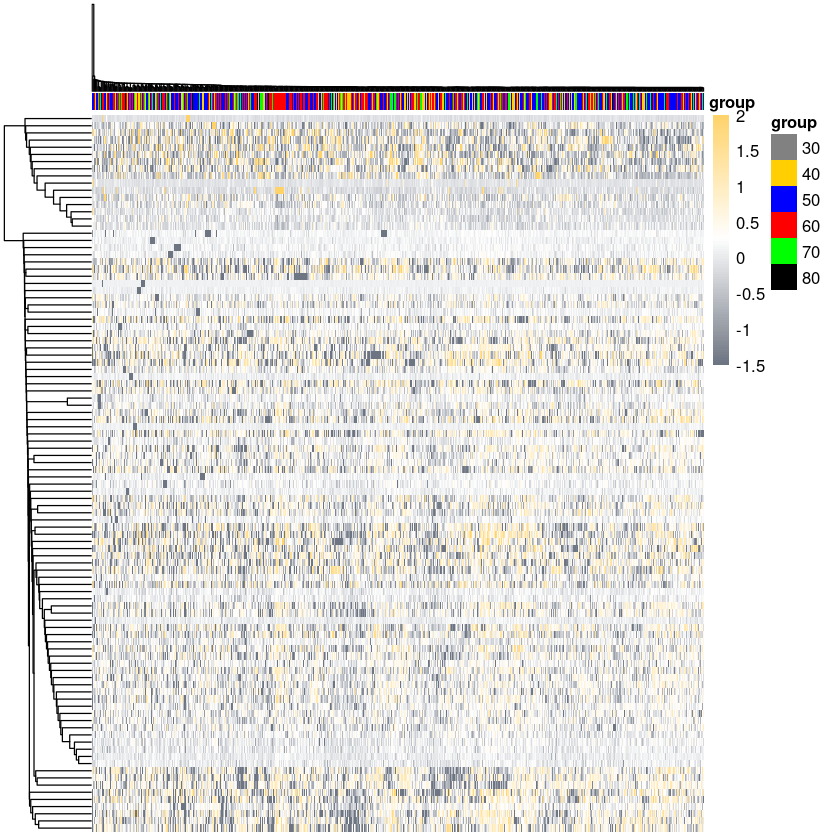

In [57]:
p <- pheatmap(
    beta,
    scale="row", 
    annotation_col = G,
    annotation_colors=list(group=c('30'="#818181", '40'="#ffcf01", '50'='blue', '60'='red', '70'='green', '80'='black')),
    color=colorRampPalette(c("#6E7582", "#ffffff", "#ffd369"))(100),
    breaks = seq(from=-1.5, to=2, length.out=100), 
    clustering_method = 'average',
    show_rownames = F,
    show_colnames = F,
    # cluster_cols = F
    )
##    #393E46 #ffd369
##    #2B3499 #FF6C22 #FF9209 
##    #818181 #ffcf01


save_pheatmap_png <- function(x, filename, width=8000, height=8000, res = 1000, units = "px") {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename, width=width, height=height, res = res, units = units)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_png(p,"/disk0/sm/methyl/TEST/0908/plot/heatmap.png")

# dev.off()

In [ ]:
############################## 중간 진도 보고서 #################################

In [134]:
test<- read.table("/disk2/kb/sm/methyl/meth/01/dmpdmr_heat_t.txt", sep="\t", fill = TRUE, header=TRUE, row.names=1)#
test1 <- test[, 1:860]
test2 <- test[, 861:1720]
test3 <- test[, 1721:1760]
# head(test1)
# head(test2)
head(test)

,NIH23J4525047,NIH23J4645560,NIH23J4183005,NIH23J4875505,NIH23J4202522,NIH23J4066208,NIH23J4074010,NIH23J4765188,NIH23J4464191,NIH23J4279818,⋯,NIH23J4047621_5,NIH23J4477113_5,NIH23J4656587_5,NIH23J4792694_5,NIH23J4096963_5,NIH23J4111410_5,NIH23J4338566_5,NIH23J4779601_5,NIH23J4398495_5,NIH23J4745006_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg15721666_BC11,0.25333812,0.28773378,0.2743259,0.28967187,0.2744809,0.31776120,0.28206261,0.2713071,0.2755097,0.3146258,⋯,0.44898087,0.44629368,0.38632566,0.42817037,0.44111272,0.42858288,0.45368611,0.39861721,0.31457965,0.42177297
cg16867657_BC11,0.68757536,0.67274275,0.7673466,0.61839711,0.6754225,0.70306935,0.65320593,0.6328774,0.7233234,0.6359134,⋯,0.68919976,0.86942137,0.76922460,0.71532284,0.81768692,0.74145300,0.72852804,0.66165259,0.61831054,0.71577077
cg27143049_TC11,0.27654222,0.28073687,0.2773576,0.28463851,0.2791688,0.29027822,0.28021656,0.2703235,0.2387133,0.3061663,⋯,0.29625363,0.27382813,0.29390021,0.33210862,0.30713515,0.28222140,0.28558087,0.29792552,0.23957780,0.32446417
cg07786668_TC11,0.07063653,0.06791230,0.1188224,0.15140847,0.1413040,0.10810525,0.16709908,0.1279216,0.1205586,0.1587747,⋯,0.01955970,0.02049927,0.01954802,0.02157655,0.01466614,0.01526493,0.01199874,0.01588735,0.01942152,0.02024502
cg24654547_TC11,0.07053529,0.06761785,0.1371775,0.14739305,0.1420453,0.09652987,0.13349021,0.1392850,0.1367772,0.1545501,⋯,0.02261991,0.02633632,0.02239567,0.01143885,0.01289952,0.01189336,0.01506784,0.01735779,0.02533566,0.01333248
cg24724428_BC11,0.16379278,0.17346315,0.2347828,0.09820995,0.1406838,0.18142658,0.09775219,0.1233871,0.1656068,0.1140756,⋯,0.20764218,0.27592648,0.30249570,0.23628631,0.33102396,0.25608816,0.29780709,0.20310490,0.23461117,0.26702778


In [159]:
# low_cpglist <- as.character(low_cpglist)

# low_cpgbeta <- beta.Noob.BMIQ[low_cpglist, ]
png(filename="/disk2/kb/sm/methyl/meth/01/plot/heatmap.png",width=3000,height=5000,unit="px")
# test <- cpgbeta
library('ComplexHeatmap')
library(reshape2)
library(dendsort)
x <- nrow(test)

# 색상 지정
library(circlize)
# col_fun = colorRamp2(seq(0, 1, 0.05), c("#ff8484", "#ffb184", "#ffe284", "#b5ff84", "#84ff94", "#84ffc6","#84fff9","#84afff","#9084ff", "#ce84ff", "#ff84eb", 
                                    #    "#ff5c5c", "#ff9050", "#ffd23f", "#90fd46", "#3bff55", "#44ffa8","#52fff6","#4485ff","#5846ff", "#b23eff"), space = "XYZ")
# col_fun = colorRamp2(seq(0, 1, 0.05), c("#ff0000", "#ffb184", "#ffe284", "#b5ff84", "#84ff94", "#84ffc6","#84fff9","#84afff","#9084ff", "#ce84ff", "#ff84eb", 
                                    #    "#ff5c5c", "#ff9050", "#ffd23f", "#90fd46", "#3bff55", "#44ffa8","#52fff6","#4485ff","#5846ff", "#b23eff"), space = "XYZ")
col_fun = colorRamp2(seq(0, 1, 0.1), c("yellow", "orange", "red", "hotpink",  "purple", "blue", 'skyblue', 'green', 'grey', 'black', 'white'), space = "XYZ")



col_fun(seq(-3, 3))

library(cluster)
# 이름 너무 길어서 걍 숫자로 해버림
rownames(test) = paste0("row", seq_len(x))

# 클러스터링 옵션
library(cluster)
library(dendsort)
# row_dend = dendsort(hclust(dist(test)))
col_dend = dendsort(hclust(dist(t(test))))

# 행렬을 정렬한다
library(seriation)
o1 = seriate(dist(test), method = "GW")
o2 = seriate(dist(t(test)), method = "GW")

Heatmap(test,
 col = col_fun, # 색깔이랑 디자인은 col_fun에 있다
 column_title = 'DMR analysis',    # 제목이다
 column_title_gp = gpar(fontsize = 20, fontface = "bold"),  # 제목의 디자인은 이거다
 row_title = "sample",    # 행의 제목은 저거다
 row_dend_width = unit(2, "cm"),    # 행 덴드그램 높이

 cluster_columns = col_dend,
 cluster_rows = diana(test)
)
dev.off()

[1] "#FFFF00FF" "#FFFF00FF" "#FFFF00FF" "#FFFF00FF" "#FFFFFFFF" "#FFFFFFFF"
[7] "#FFFFFFFF"

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

In [149]:
# low_cpglist <- as.character(low_cpglist)
library('ComplexHeatmap')
library(reshape2)
library(dendsort)
library(circlize)
library(cluster)
library(dendsort)
# low_cpgbeta <- beta.Noob.BMIQ[low_cpglist, ]
png(filename="/disk2/kb/sm/methyl/meth/01/plot/heatmapt.png",width=3000,height=5000,unit="px")

x <- nrow(test)
# 색상 지정
col_fun = colorRamp2(seq(0, 1, 0.1), c("#ff8484", "#858585", "#000000", "#c300ff", "#0905d1", "#008cff","#54ff05","#ffffff","yellow", "orange", "red"), space = "XYZ")
col_fun(seq(-3, 3))

# 이름 너무 길어서 걍 숫자로 해버림
rownames(test1) = seq(nrow(test1))
rownames(test2) = seq(nrow(test2))
rownames(test3) = seq(nrow(test3))


# 행렬을 정렬한다
library(seriation)
# o1 = seriate(dist(test), method = "GW")
# o2 = seriate(dist(t(test)), method = "GW")

ht1 <- Heatmap(test1,
 col = col_fun, # 색깔이랑 디자인은 col_fun에 있다
 cluster_rows = diana(test1)
)
ht2 <- Heatmap(test2,
 col = col_fun, # 색깔이랑 디자인은 col_fun에 있다
 cluster_rows = diana(test1)
)
ht3 <- Heatmap(test3,
 col = col_fun, # 색깔이랑 디자인은 col_fun에 있다
 cluster_rows = diana(test1)
)

ht_list = ht1 + ht2 + ht3
draw(ht_list, ht_gap = unit(0, "cm"))
dev.off()

[1] "#FF8484FF" "#FF8484FF" "#FF8484FF" "#FF8484FF" "#CE84FFFF" "#CE84FFFF"
[7] "#CE84FFFF"

Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

In [1]:
library(pheatmap) ## for heatmap generation
library(tidyverse) ## for data wrangling
library(ggplotify) ## to convert pheatmap to ggplot2
library(heatmaply) ## for constructing interactive heatmap

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: viridis

Loading required package: viridisLite


Welcome to heatmaply version 1.5.0

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main docume

In [31]:
test<- read.table("/disk2/kb/sm/methyl/meth/01/dmpdmr_heat_1720.txt", sep="\t", fill = TRUE, header=TRUE, row.names=1)[, 1:1720]
head(test)

,NIH23J4525047,NIH23J4645560,NIH23J4183005,NIH23J4875505,NIH23J4202522,NIH23J4066208,NIH23J4074010,NIH23J4765188,NIH23J4464191,NIH23J4279818,⋯,NIH23J4500207_11,NIH23J4005313_11,NIH23J4247517_11,NIH23J4242881_11,NIH23J4106854_11,NIH23J4906355_11,NIH23J4398495_11,NIH23J4422798_11,NIH23J4614015_11,NIH23J4162427_11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg04062882_BC11,0.38114931,0.3285464,0.3617116,0.3275498,0.3446721,0.4063439,0.2899356,0.3354308,0.3675420,0.2049919,⋯,0.17838371,0.14913547,0.2188823,0.26198216,0.28161215,0.29194624,0.32466591,0.22934271,0.31745480,0.25162921
cg05310730_BC11,0.42350584,0.3801313,0.3634137,0.3159161,0.3845107,0.3805499,0.3338607,0.3823479,0.3442932,0.3338742,⋯,0.19054436,0.13287074,0.2238156,0.32884745,0.21176684,0.29575557,0.23322786,0.16867435,0.27049352,0.32221190
cg23729101_TC11,0.46990369,0.4726830,0.4611149,0.4790509,0.5404987,0.4950105,0.4862202,0.4385296,0.5050748,0.4793772,⋯,0.42292115,0.38132110,0.3899285,0.37815121,0.27516433,0.41109338,0.27332186,0.26655892,0.48922811,0.50284420
cg07786668_TC11,0.07063653,0.0679123,0.1188224,0.1514085,0.1413040,0.1081053,0.1670991,0.1279216,0.1205586,0.1587747,⋯,0.05336776,0.06337559,0.0525682,0.04922436,0.07401291,0.04737944,0.03637243,0.04071722,0.03117371,0.03887816
cg00614832_TC11,0.11120682,0.1085630,0.1364527,0.1486189,0.1688377,0.1310100,0.1826739,0.1351203,0.1636594,0.1820995,⋯,0.10684075,0.11299331,0.1211886,0.14541475,0.11213375,0.13293641,0.14832771,0.10399538,0.12815698,0.12949941
cg25636796_TC11,0.48097723,0.4380350,0.4008148,0.4289662,0.4059322,0.3669980,0.3856075,0.5013457,0.4180970,0.3953784,⋯,0.26385302,0.16861247,0.2590651,0.37010876,0.28868359,0.31989454,0.33827252,0.32202854,0.37686040,0.44015776


In [32]:
dfh<-data.frame(sample=as.character(colnames(test)),group="Treatment")%>%column_to_rownames("sample")
dfh$group<-ifelse(rownames(dfh) %in% colnames(test), c(rep('1', 860), rep('11', 860)))
head(dfh)
# , rep('5', 40)

,group
,<chr>
NIH23J4525047,1
NIH23J4645560,1
NIH23J4183005,1
NIH23J4875505,1
NIH23J4202522,1
NIH23J4066208,1


png 
  2

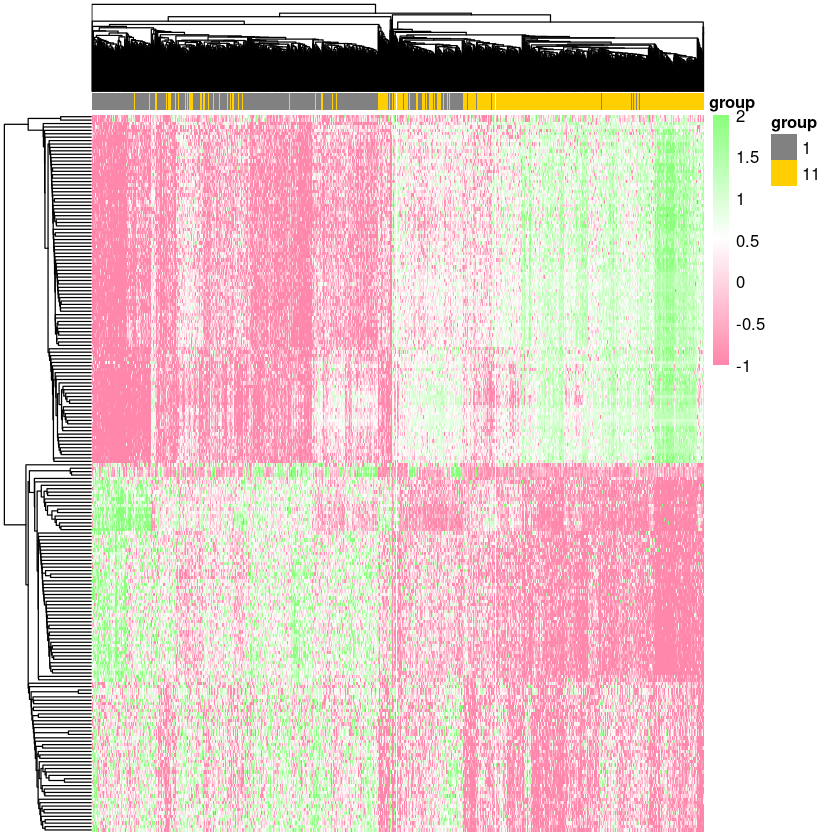

In [33]:
# png(filename="/disk2/kb/sm/methyl/meth/01/plot/1720_heat.png",width=2000,height=3000,unit="px", type = "cairo", bg = "transparent")
p <- pheatmap(
    test,scale="row", 
    annotation_col = dfh,
    annotation_colors=list(group=c('1'="#818181", '11'="#ffcf01")),
    color=colorRampPalette(c("#ff87ab", "#ffffff", "#89ff7a"))(100),
    # color=colorRampPalette(c("#ff5100", '#ff9800', "#ffd300", "#00ff78", '#0081ff'))(100),
    breaks = seq(from=-1, to=2, length.out=100), 
    clustering_method = 'average',
    show_rownames = F,
    show_colnames = F
    # cluster_cols = F
    )


save_pheatmap_png <- function(x, filename, width=2000, height=2000, res = 300, units = "px") {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename, width=width, height=height, res = res, units = units)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_png(p,"/disk2/kb/sm/methyl/meth/01/plot/1720_heat.png")

# dev.off()

In [3]:
test<- read.table("/disk2/kb/sm/methyl/meth/01/dmpdmr_heat_111.txt", sep="\t", fill = TRUE, header=TRUE, row.names=1)[, 1:1720]
head(test)

,NIH23J4525047,NIH23J4645560,NIH23J4183005,NIH23J4875505,NIH23J4202522,NIH23J4066208,NIH23J4074010,NIH23J4765188,NIH23J4464191,NIH23J4279818,⋯,NIH23J4500207_11,NIH23J4005313_11,NIH23J4247517_11,NIH23J4242881_11,NIH23J4106854_11,NIH23J4906355_11,NIH23J4398495_11,NIH23J4422798_11,NIH23J4614015_11,NIH23J4162427_11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg10969738_BC11,0.6024499,0.6251277,0.6813963,0.6644294,0.5994312,0.7012259,0.6893148,0.6398777,0.5627440,0.6663689,⋯,0.8327616,0.8552059,0.7168123,0.6970724,0.7972601,0.6939323,0.6817531,0.6390589,0.6753294,0.7653684
cg21255583_BC11,0.5843610,0.5850895,0.6069510,0.6017791,0.5530715,0.6779559,0.6397079,0.5213071,0.5877083,0.6076292,⋯,0.7054167,0.8224184,0.7050644,0.6555569,0.6940129,0.6338923,0.6499885,0.6207175,0.6987793,0.6733043
cg19345562_BC11,0.6613720,0.5866842,0.6724002,0.6729234,0.6954144,0.5797063,0.6073741,0.5888163,0.5425724,0.7499598,⋯,0.7805805,0.8840198,0.7520326,0.6816919,0.7477734,0.6722410,0.6083125,0.5648211,0.7509214,0.6970060
cg04918897_TC11,0.6564173,0.5732196,0.6905162,0.6185122,0.6080870,0.6718015,0.6884390,0.5347480,0.5658464,0.6594759,⋯,0.7992174,0.8130073,0.7492140,0.7371589,0.7185511,0.6916142,0.6911507,0.7188946,0.8350135,0.6775130
cg18410249_TC11,0.6539733,0.6404085,0.6587000,0.6451708,0.6316205,0.6583470,0.7111443,0.6702865,0.6945386,0.7322307,⋯,0.7996179,0.8511172,0.7845340,0.7536140,0.8067423,0.7261919,0.7493437,0.6300235,0.6386516,0.6417566
cg22943590_TC21,0.8486130,0.5350498,0.6249367,0.9162889,0.7963826,0.7338248,0.5514980,0.7825520,0.6534087,0.7440652,⋯,0.6262044,0.6339793,0.3956416,0.6229779,0.3015266,0.6839381,0.6641026,0.4124315,0.5993202,0.4073118


In [4]:
dfh<-data.frame(sample=as.character(colnames(test)),group="Treatment")%>%column_to_rownames("sample")
dfh$group<-ifelse(rownames(dfh) %in% colnames(test), c(rep('1', 860), rep('11', 860)))
head(dfh)
# , rep('5', 40)

,group
,<chr>
NIH23J4525047,1
NIH23J4645560,1
NIH23J4183005,1
NIH23J4875505,1
NIH23J4202522,1
NIH23J4066208,1


png 
  2

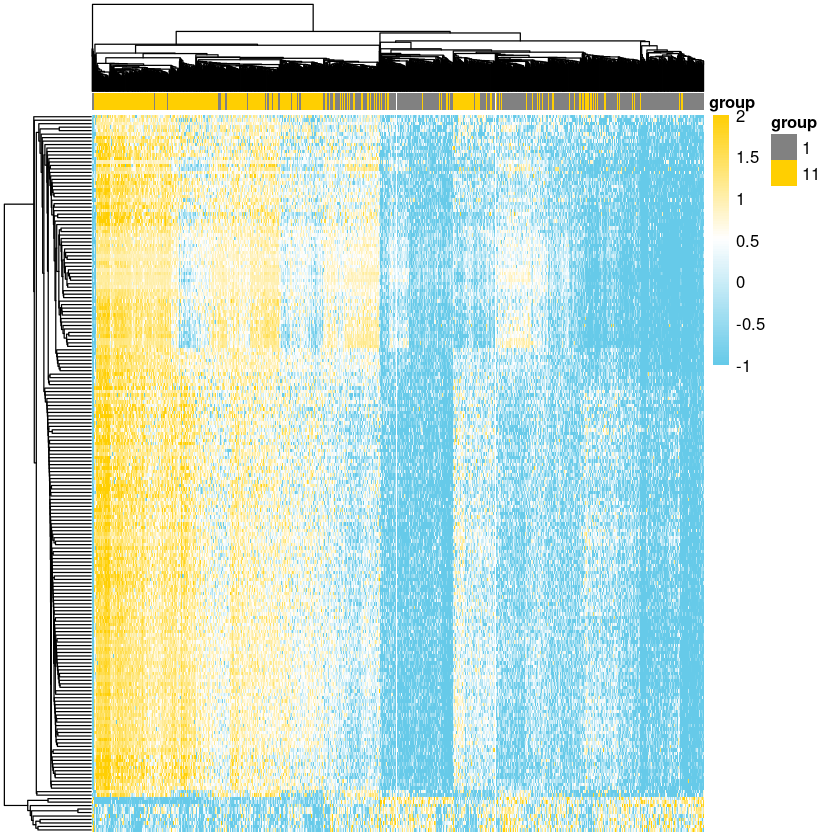

In [20]:
# png(filename="/disk2/kb/sm/methyl/meth/01/plot/1720_heat.png",width=2000,height=3000,unit="px", type = "cairo", bg = "transparent")
p <- pheatmap(
    test,scale="row", 
    annotation_col = dfh,
    annotation_colors=list(group=c('1'="#818181", '11'="#ffcf01")),
    color=colorRampPalette(c("#66cae9", "#ffffff", "#ffcf01"))(100),
    # color=colorRampPalette(c("#ff5100", '#ff9800', "#ffd300", "#00ff78", '#0081ff'))(100),
    breaks = seq(from=-1, to=2, length.out=100), 
    clustering_method = 'average',
    show_rownames = F,
    show_colnames = F, 
    show_
    # cluster_cols = F
    )


save_pheatmap_png <- function(x, filename, width=2000, height=2000, res = 300, units = "px") {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename, width=width, height=height, res = res, units = units)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_png(p,"/disk2/kb/sm/methyl/meth/01/plot/heat_111.png")

# dev.off()

In [65]:
f <- data.frame(t(beta['cg10270053_TC21', 1:1720]))
f$group <- c(rep('1', 860), rep('11', 860))
names(f) <- c('ID', 'group')
# beta <- cbind(pheno, beta)
# beta <- data.frame(beta)
colr <- c('#ffd45d', '#1f86fc')



p <- ggplot(f, aes(x=group, y=ID, group=group, fill=group)) + 
  geom_boxplot(outlier.shape = NA) + #
  scale_fill_manual(values=colr) +
  labs(title='cg10270053_TC21', y='beta') + 
  theme_bw() +
  theme(
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    plot.title = element_text(hjust = 0.5,size=10,face='bold'),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size=8),
    legend.text = element_text(size=8),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_line(linetype = "dotted", colour = "grey70"),
    legend.title = element_blank(),
    legend.position = 'right'
  )
ggsave(p, file='/disk2/kb/sm/methyl/meth/01/plot/cpg_esr1.png', width=1500, height=1500, units='px')


ERROR: Error in (function (cond) : error in evaluating the argument 'x' in selecting a method for function 't': object of type 'closure' is not subsettable


In [25]:
gene <- read.table('/disk2/kb/sm/methyl/meth/01/gene_count_210.txt', sep='\t', header=T)
# gene
# gene_s <- gene[gene$COUNT > 24, ]
head(gene)
dim(gene)

,gene_name,count
,<chr>,<int>
1,NRAS,4
2,DDX4,3
3,PIK3R1,3
4,FEZ2,2
5,DOCK4,2
6,ZFHX3,2


[1] 132   2

In [24]:
p <- ggplot(gene, aes(x=reorder(gene_name, -count), y=count))+
  geom_bar(stat = "identity", size=.2, width=0.6, fill='#80B1D3') +
  labs(x='gene', y = 'number of cpg') +
  theme_bw() +
  theme(
    axis.text.x = element_text(size=7, angle=90, hjust=1),
    axis.text.y = element_text(size=5),
    plot.title = element_text(hjust = 0.5,size=10,face='bold'),
    axis.title.x = element_text(size=8),
    axis.title.y = element_text(size=8),
    legend.text = element_text(size=8),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_line(linetype = "dotted", colour = "grey70"),
    legend.title = element_blank(),
    legend.position = 'none'
        ) +
    scale_fill_manual(values=c('#FB8072'))
ggsave(p, file='/disk2/kb/sm/methyl/meth/01/plot/gene.png', width=4000, height=3000, units='px')

In [18]:
island <- read.table('/disk2/kb/sm/methyl/meth/01/island_count.txt', sep='\t', header=T)
island$Name <- c('CpG OpenSea', 'CpG Shore', 'CpG Island', 'CpG Shelf')
island$Name <- factor(island$Name , level=c('CpG Island', 'CpG Shore', 'CpG Shelf', 'CpG OpenSea'))

head(island)
dim(island)

,Relation_to_Island,count,Name
,<chr>,<int>,<fct>
1,OpenSea,435753,CpG OpenSea
2,Shore,81348,CpG Shore
3,Island,58972,CpG Island
4,Shelf,46531,CpG Shelf


[1] 4 3

In [20]:
p <- ggplot(island, aes(x=Name, y=count, fill=Name))+
  geom_bar(stat = "identity", size=.2, width=0.6) +
  coord_cartesian(ylim = c(0, 450000)) +
  scale_y_continuous(breaks = seq(0, 450000, 50000), labels = c('0', '50000', '100000', '150000', '200000', '250000', '300000', '350000', '400000', '450000')) +
  labs(x='CpG Annotations', y = 'number of DMR') +
  theme_bw() +
  theme(
    axis.text.x = element_text(size=7),
    axis.text.y = element_text(size=5),
    plot.title = element_text(hjust = 0.5,size=10,face='bold'),
    axis.title.x = element_text(size=8),
    axis.title.y = element_text(size=8),
    legend.text = element_text(size=8),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey90"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "grey80"),
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_blank(),
    legend.title = element_blank(),
    legend.position = 'none'
        ) +
    scale_fill_manual(values=c('#fbc072', '#fbb472', '#79b3ff', '#3754f5'))
ggsave(p, file='/disk2/kb/sm/methyl/meth/01/plot/island.png', width=2000, height=1500, units='px')

In [32]:
age <- read.table('/disk2/kb/sm/methyl/meth/01/age_1720.txt', sep='\t', header=T)
age$rate = age$Horvath/age$Actual.age
head(age)
dim(age)

,id,Horvath,Hannum,Levine,skinHorvath,BLUP,EN,Actual.age,rate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,NIH23J4001844,54.85676,19.69500,42.58283,37.43845,47.58436,40.89036,43,1.275739
2,NIH23J4003068,51.42063,18.68510,52.59007,38.55102,51.70972,43.96945,49,1.049401
3,NIH23J4004796,62.50507,24.77494,53.59178,46.40518,58.07346,51.20743,58,1.077674
4,NIH23J4005313,62.49224,26.00667,57.47678,47.36481,55.52570,50.40907,53,1.179099
5,NIH23J4005454,74.80540,35.65842,59.62244,54.05543,59.76074,57.10333,59,1.267888
6,NIH23J4007486,49.80651,12.62229,41.75317,33.35458,43.84964,38.20834,41,1.214793


[1] 1720    9

In [4]:
library(RColorBrewer)
library(dplyr)
library(reshape2)
library(ggplot2)
library(grid)
library(RColorBrewer)


Attaching package: ‘grid’




The following object is masked from ‘package:Biostrings’:

    pattern




In [59]:
axis_num <- 'black'
grob3 <- grobTree(textGrob(paste("Coefficient : ", cor(age$Actual.age, age$Horvath)), x = 0.03, y = 0.97, hjust = 0, gp = gpar(col = "#ff4848", fontsize = 7, fontface = "bold")))
p <- ggplot(data=age, aes(x=Actual.age, y=Horvath)) +
geom_point(size=0.1) +
  labs(title = "AGE Analysis", 
        x = 'actual age', 
        y = 'predicted age') + 
  theme_bw() +
  theme(
  #   axis.text.x = element_text(seq(0, 2198), angle=30, hjust=1),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    plot.title = element_text(hjust = 0.5,size=10,face='bold'),
    axis.title.x = element_text(size=8),
    axis.title.y = element_text(size=8),
    axis.ticks.x = element_line(color = axis_num),
    legend.text = element_text(size=10),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey80"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "gray70"), 
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_blank(), 
    legend.title = element_blank()
    ) +
    geom_smooth(method=lm, se=F, color='#ff0055') +
    annotation_custom(grob3)
#   scale_colour_manual(values=c('#ff4040')) 
# ggsave(p, file='/disk2/kb/sm/chip/plot/final/total.png', width=2833, height=1890, units='px')
ggsave(p, file='/disk2/kb/sm/methyl/meth/01/plot/age_1720.png', width=1500, height=1500, units='px')

`geom_smooth()` using formula = 'y ~ x'


In [13]:
age <- read.table('/disk2/kb/sm/methyl/meth/01/age_strange.txt', sep='\t', header=T)
head(age)
dim(age)

,id,Actual.age,X1_sub,X11_sub,strange
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,NIH23J4001844,43,11.856765,7.092379,-4.7643863
2,NIH23J4003068,49,2.420628,3.184426,0.7637979
3,NIH23J4004796,58,4.505074,-4.215059,-8.7201329
4,NIH23J4005313,53,9.492241,15.108239,5.6159983
5,NIH23J4005454,59,15.805395,10.938615,-4.8667806
6,NIH23J4007486,41,8.806515,5.314944,-3.4915714


[1] 860   5

In [12]:
axis_num <- 'black'
grob3 <- grobTree(textGrob(paste("Coefficient : ", cor(age$Actual.age, age$strange)), x = 0.03, y = 0.97, hjust = 0, gp = gpar(col = "#ff4848", fontsize = 7, fontface = "bold")))
p <- ggplot(data=age, aes(x=Actual.age, y=strange)) +
geom_point(size=0.1) +
  labs(title = "AGE Analysis", 
        x = 'actual age') + 
  theme_bw() +
  theme(
  #   axis.text.x = element_text(seq(0, 2198), angle=30, hjust=1),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    plot.title = element_text(hjust = 0.5,size=10,face='bold'),
    axis.title.x = element_text(size=8),
    axis.title.y = element_text(size=8),
    axis.ticks.x = element_line(color = axis_num),
    legend.text = element_text(size=10),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey80"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "gray70"), 
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_blank(), 
    legend.title = element_blank()
    ) +
    geom_smooth(se=F, color='#ff0055') +
    annotation_custom(grob3)
#   scale_colour_manual(values=c('#ff4040')) 
# ggsave(p, file='/disk2/kb/sm/chip/plot/final/total.png', width=2833, height=1890, units='px')
ggsave(p, file='/disk2/kb/sm/methyl/meth/01/plot/age_strange.png', width=1500, height=1500, units='px')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


In [79]:
# box <- read.table("/disk2/kb/sm/methyl/meth/01/data/dmpdmr_heat_111.txt", sep="\t", fill = TRUE, header=TRUE, row.names=1)[, 1:1720]
gender <- read.table("/disk2/kb/sm/methyl/meth/01/data/gender.txt", sep="\t", fill = TRUE, header=TRUE)[1:1720,]
# m_box <- melt(box)

In [78]:
install.packages("ggpubr")
library("ggpubr")
library("dplyr") 

In [83]:
f <- data.frame(t(beta['cg10270053_TC21', 1:1720]))
f$group <- c(rep('1', 860), rep('11', 860))
names(f) <- c('ID', 'group')
f$gender <- gender$gender

colr <- c('#5dffd7', '#fc1f8d')
#5dffbc

# p + 
p <- ggplot(f, aes(x=group, y=ID, fill=gender), stat = 'identity') + 
  geom_boxplot(outlier.shape = NA) + #
  scale_fill_manual(values=colr) +
  labs(title='ESR1', y='beta') + 
  theme_bw() +
  theme(
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    plot.title = element_text(hjust = 0.5,size=10,face='bold'),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size=8),
    legend.text = element_text(size=8),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_line(linetype = "dotted", colour = "grey70"),
    legend.title = element_blank(),
    legend.position = 'right'
  ) +
  stat_compare_means(method = "t.test")
ggsave(p, file='/disk2/kb/sm/methyl/meth/01/plot/gender_esr1.png', width=1500, height=1500, units='px')


ERROR: Error in (function (cond) : error in evaluating the argument 'x' in selecting a method for function 't': object of type 'closure' is not subsettable
